# Exploratory Data Analysis (EDA)

Purpose -> Quick, readable overview to support slides and dashboard.

In [5]:
# --- Project Imports & Config ---
from pathlib import Path
import pandas as pd
import numpy as np
import sys

# plotting
import matplotlib.pyplot as plt
# (Optional) uncomment if plotly is preferred in the dashboard prototype
# import plotly.express as px
# import plotly.graph_objects as go

# stats
import statsmodels.api as sm

# sklearn (used in correlation/PCA/ML notebooks where relevant)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Paths (analysis/data)
DATA_DIR = Path("data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

INGEST_DIR = Path("../ingestion/yfinance")
sys.path.append(str(INGEST_DIR))

import yfinance_methods_v2 as ym
print('DATA_DIR ->', DATA_DIR.resolve())
print('INGEST_DIR ->', INGEST_DIR.resolve())


DATA_DIR -> C:\Users\sherv\workingdir\Projects\stock_analysis_tool\git\analysis\data
INGEST_DIR -> C:\Users\sherv\workingdir\Projects\stock_analysis_tool\git\ingestion\yfinance


## 1. Universe and metadata

This section builds a compact table of tickers and metadata.

In [6]:
# One-line universe metadata table (runs quickly)
try:
    overview = (pd.concat([ym.get_company_metadata(tk) for tk in ["AAPL","MSFT","QQQ","SPY"]])
                  .pivot(index='ticker', columns='key', values='value')
                  .reset_index()[['ticker','longName','quoteType','exchange','currency']])
    display(overview)
except Exception as e:
    print('Error building overview:', e)


key,ticker,longName,quoteType,exchange,currency
0,AAPL,Apple Inc.,EQUITY,NMS,USD
1,MSFT,Microsoft Corporation,EQUITY,NMS,USD
2,QQQ,Invesco QQQ Trust,ETF,NGM,USD
3,SPY,SPDR S&P 500 ETF,ETF,PCX,USD


## 2. Single-ticker snapshot

Preview one ticker's recent price series and basic info.

In [7]:
PREVIEW_TICKER = 'AAPL'
try:
    df = ym.get_ohlcv_data(PREVIEW_TICKER, period='5y', interval='1d')
    display(df.head())
except Exception as e:
    print('Error fetching preview:', e)


,ticker,date,open,high,low,close,adj_close,volume,dividends,splits
0,AAPL,2020-08-21 04:00:00+00:00,119.262497,124.867500,119.250000,124.370003,120.976921,338054800,0.0,0.0
1,AAPL,2020-08-24 04:00:00+00:00,128.697495,128.785004,123.937500,125.857498,122.423828,345937600,0.0,0.0
2,AAPL,2020-08-25 04:00:00+00:00,124.697502,125.180000,123.052498,124.824997,121.419495,211495600,0.0,0.0
3,AAPL,2020-08-26 04:00:00+00:00,126.180000,126.992500,125.082497,126.522499,123.070694,163022400,0.0,0.0
4,AAPL,2020-08-27 04:00:00+00:00,127.142502,127.485001,123.832497,125.010002,121.599457,155552400,0.0,0.0


## 3. Optional executive teaser

A small indexed-to-100 plot for a short subset to use as a teaser slide.

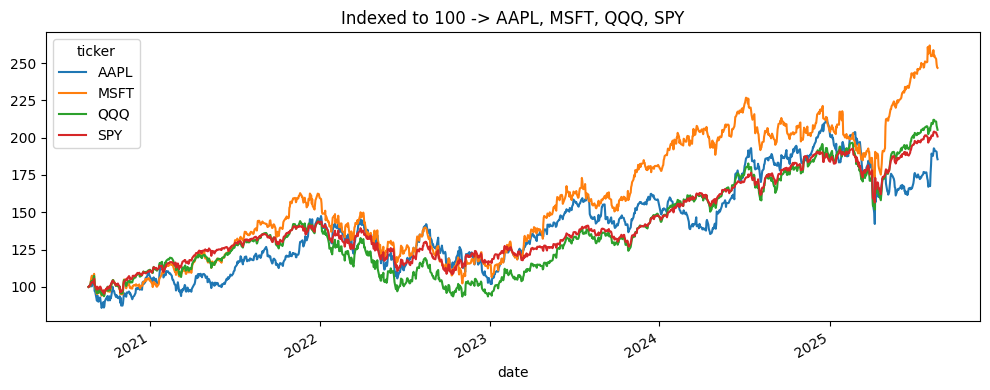

In [8]:
SUBSET = ['AAPL','MSFT','QQQ','SPY']
try:
    frames = [ym.get_ohlcv_data(tk, period='5y', interval='1d')[['date','ticker','adj_close','close']] for tk in SUBSET]
    df = pd.concat(frames, ignore_index=True)
    df['px'] = df['adj_close'].where(df['adj_close'].notna(), df['close'])
    wide = df.pivot(index='date', columns='ticker', values='px').dropna()
    indexed = wide / wide.iloc[0] * 100
    ax = indexed.plot(figsize=(10,4), title='Indexed to 100 -> ' + ', '.join(SUBSET))
    ax.figure.tight_layout()
except Exception as e:
    print('Error building teaser:', e)
